# NoteBook Setup

In [3]:
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install kneed
!pip install nbimporter
!pip install plotly



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\ibrah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import streamlit as st
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import to_hex
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from functions_utils import *
from scipy.stats import zscore
from collections import defaultdict
from matplotlib.lines import Line2D


pd.set_option('display.max_columns', None)

# Champions League Data

## Standard Stats

In [7]:
import pandas as pd
import re

standard_stats = pd.read_html(
    'https://fbref.com/en/comps/8/stats/Champions-League-Stats',
    attrs={'id': 'stats_squads_standard_for'}
)[0]

standard_stats.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in standard_stats.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

standard_stats.columns = [clean_column(col) for col in standard_stats.columns]

standard_stats['squad'] = standard_stats['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

standard_stats.head()


,squad,#_pl,age,poss,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_g+a,per_90_minutes_g-pk,per_90_minutes_g+a-pk,per_90_minutes_xg,per_90_minutes_xag,per_90_minutes_xg+xag,per_90_minutes_npxg,per_90_minutes_npxg+xag
0,Arsenal,24,26.6,51.0,14,154,1260,14.0,30,18,48,28,2,5,27,0,27.1,23.2,18.0,41.3,255,534,2.14,1.29,3.43,2.00,3.29,1.94,1.29,3.23,1.66,2.95
1,Aston Villa,25,27.9,47.3,12,132,1080,12.0,22,18,40,21,1,2,19,0,18.8,17.2,14.9,32.1,173,397,1.83,1.50,3.33,1.75,3.25,1.57,1.24,2.81,1.44,2.68
2,Atalanta,24,28.4,53.3,10,110,900,10.0,22,19,41,21,1,3,19,1,24.5,22.0,18.9,40.9,278,517,2.20,1.90,4.10,2.10,4.00,2.45,1.89,4.34,2.20,4.09
3,Atlético Madrid,23,29.2,47.4,10,110,930,10.3,22,17,39,22,0,0,18,1,14.5,14.5,12.1,26.7,210,419,2.13,1.65,3.77,2.13,3.77,1.41,1.17,2.58,1.41,2.58
4,Barcelona,27,25.9,61.3,14,154,1290,14.3,40,30,70,37,3,3,14,2,32.2,29.9,23.9,53.8,290,744,2.79,2.09,4.88,2.58,4.67,2.25,1.67,3.92,2.08,3.75


In [8]:
squad_mins = standard_stats[['squad','playing_time_min']]

## Squad Passing

In [9]:
squad_passing = pd.read_html(
    'https://fbref.com/en/comps/8/passing/Champions-League-Stats',
    attrs={'id': 'stats_squads_passing_for'}
)[0]

squad_passing.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_passing.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_passing.columns = [clean_column(col) for col in squad_passing.columns]

squad_passing['squad'] = squad_passing['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_passing = squad_passing.merge(squad_mins, on='squad', how='left')

squad_passing.head()


,squad,#_pl,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp,playing_time_min
0,Arsenal,24,14.0,5647,6761,83.5,93566,31041,2789,3082,90.5,2416,2714,89.0,347,684,50.7,18,18.0,22.1,0.0,137,477,121,30,534,1260
1,Aston Villa,25,12.0,4617,5511,83.8,78594,28437,2124,2357,90.1,2171,2429,89.4,274,530,51.7,18,14.9,13.4,3.1,118,339,95,21,397,1080
2,Atalanta,24,10.0,4633,5529,83.8,75124,23931,2341,2572,91.0,1814,2046,88.7,321,549,58.5,19,18.9,20.0,0.1,138,332,136,45,517,900
3,Atlético Madrid,23,10.3,4794,5690,84.3,77611,24769,2379,2638,90.2,1895,2139,88.6,345,589,58.6,17,12.1,10.9,4.9,100,338,101,26,419,930
4,Barcelona,27,14.3,7645,8853,86.4,128971,40462,3527,3839,91.9,3334,3704,90.0,576,900,64.0,30,23.9,18.6,6.1,161,646,137,20,744,1290


## Squad Shooting

In [10]:
squad_shooting = pd.read_html(
    'https://fbref.com/en/comps/8/shooting/Champions-League-Stats',
    attrs={'id': 'stats_squads_shooting_for'}
)[0]

squad_shooting.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_shooting.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_shooting.columns = [clean_column(col) for col in squad_shooting.columns]

squad_shooting['squad'] = squad_shooting['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_shooting.head()


,squad,#_pl,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg
0,Arsenal,24,14.0,30,179,76,42.5,12.79,5.43,0.16,0.37,14.8,5,2,5,27.1,23.2,0.13,2.9,4.8
1,Aston Villa,25,12.0,22,152,61,40.1,12.67,5.08,0.14,0.34,17.4,7,1,2,18.8,17.2,0.12,3.2,3.8
2,Atalanta,24,10.0,22,171,61,35.7,17.10,6.10,0.12,0.34,15.0,3,1,3,24.5,22.0,0.13,-2.5,-1.0
3,Atlético Madrid,23,10.3,22,123,48,39.0,11.90,4.65,0.18,0.46,16.9,2,0,0,14.5,14.5,0.12,7.5,7.5
4,Barcelona,27,14.3,40,221,93,42.1,15.42,6.49,0.17,0.40,16.7,7,3,3,32.2,29.9,0.14,7.8,7.1


## Squad Pass Types

In [11]:
squad_pass_types = pd.read_html(
    'https://fbref.com/en/comps/8/passing_types/Champions-League-Stats',
    attrs={'id': 'stats_squads_passing_types_for'}
)[0]

squad_pass_types.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_pass_types.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_pass_types.columns = [clean_column(col) for col in squad_pass_types.columns]

squad_pass_types['squad'] = squad_pass_types['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_pass_types.head()


,squad,#_pl,90s,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks
0,Arsenal,24,14.0,6761,6197,541,145,35,20,231,213,77,73,0,1,5647,23,107
1,Aston Villa,25,12.0,5511,5031,464,153,21,11,137,174,46,25,4,1,4617,16,104
2,Atalanta,24,10.0,5529,5072,432,102,14,25,239,182,65,23,29,0,4633,25,105
3,Atlético Madrid,23,10.3,5690,5273,405,117,24,31,171,155,52,18,10,0,4794,12,96
4,Barcelona,27,14.3,8853,8164,675,239,34,44,213,255,68,34,5,0,7645,14,109


## Squad Goal and Shot Creation

In [12]:
squad_goal_shot_creation = pd.read_html(
    'https://fbref.com/en/comps/8/gca/Champions-League-Stats',
    attrs={'id': 'stats_squads_gca_for'}
)[0]

squad_goal_shot_creation.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_goal_shot_creation.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_goal_shot_creation.columns = [clean_column(col) for col in squad_goal_shot_creation.columns]

squad_goal_shot_creation['squad'] = squad_goal_shot_creation['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_goal_shot_creation.head()


,squad,#_pl,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def
0,Arsenal,24,14.0,320,22.86,238,26,18,24,11,3,52,3.71,38,2,3,4,5,0
1,Aston Villa,25,12.0,277,23.08,216,18,13,11,14,5,39,3.25,33,1,2,0,3,0
2,Atalanta,24,10.0,309,30.90,233,24,22,18,7,5,41,4.10,28,3,8,0,1,1
3,Atlético Madrid,23,10.3,222,21.48,186,11,13,2,7,3,39,3.77,32,0,6,0,1,0
4,Barcelona,27,14.3,391,27.28,282,29,31,27,17,5,66,4.60,42,5,6,8,5,0


## Squad Defensive Actions

In [13]:
squad_defensive_actions = pd.read_html(
    'https://fbref.com/en/comps/8/defense/Champions-League-Stats',
    attrs={'id': 'stats_squads_defense_for'}
)[0]

squad_defensive_actions.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_defensive_actions.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_defensive_actions.columns = [clean_column(col) for col in squad_defensive_actions.columns]

squad_defensive_actions['squad'] = squad_defensive_actions['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_defensive_actions = squad_defensive_actions.merge(squad_mins, on='squad', how='left')

squad_defensive_actions.head()


,squad,#_pl,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err,playing_time_min
0,Arsenal,24,14.0,208,117,80,87,41,86,162,53.1,76,139,35,104,101,309,216,15,1260
1,Aston Villa,25,12.0,180,101,81,68,31,92,183,50.3,91,117,41,76,89,269,181,10,1080
2,Atalanta,24,10.0,130,77,56,45,29,72,153,47.1,81,88,18,70,72,202,147,7,900
3,Atlético Madrid,23,10.3,195,122,104,64,27,105,192,54.7,87,103,24,79,97,292,184,9,930
4,Barcelona,27,14.3,229,147,80,103,46,100,220,45.5,120,169,45,124,86,315,249,8,1290


## Squad  Possession

In [14]:
squad_possession = pd.read_html(
    'https://fbref.com/en/comps/8/possession/Champions-League-Stats',
    attrs={'id': 'stats_squads_possession_for'}
)[0]

squad_possession.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_possession.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_possession.columns = [clean_column(col) for col in squad_possession.columns]

squad_possession['squad'] = squad_possession['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_possession = squad_possession.merge(squad_mins, on='squad', how='left')

squad_possession.head()


,squad,#_pl,poss,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr,playing_time_min
0,Arsenal,24,51.0,14.0,8120,677,2095,3636,2461,403,8115,266,121,45.5,126,47.4,4307,22634,12017,255,176,102,160,134,5580,522,1260
1,Aston Villa,25,47.3,12.0,6680,698,2159,3008,1579,287,6678,222,101,45.5,107,48.2,3779,21646,10829,173,143,60,149,125,4479,394,1080
2,Atalanta,24,53.3,10.0,6491,481,1615,2705,2244,321,6488,211,114,54.0,80,37.9,4696,24834,12688,278,215,75,132,85,4612,515,900
3,Atlético Madrid,23,47.4,10.3,6707,547,2000,3055,1711,234,6707,154,67,43.5,72,46.8,4462,21619,10891,210,173,55,130,73,4762,419,930
4,Barcelona,27,61.3,14.3,10369,839,2575,5187,2693,392,10366,318,149,46.9,142,44.7,5900,29199,15258,290,231,95,169,127,7595,738,1290


## Squad Playing Time

In [15]:
squad_playing_time = pd.read_html(
    'https://fbref.com/en/comps/8/playingtime/Champions-League-Stats',
    attrs={'id': 'stats_squads_playing_time_for'}
)[0]

squad_playing_time.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_playing_time.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_playing_time.columns = [clean_column(col) for col in squad_playing_time.columns]

squad_playing_time['squad'] = squad_playing_time['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_playing_time.head()


,squad,#_pl,age,playing_time_mp,playing_time_min,playing_time_mn/mp,playing_time_min%,playing_time_90s,starts_starts,starts_mn/start,starts_compl,subs_subs,subs_mn/sub,subs_unsub,team_success_ppm,team_success_ong,team_success_onga,team_success_+/-,team_success_+/-90,team_success_(xg)_onxg,team_success_(xg)_onxga,team_success_(xg)_xg+/-,team_success_(xg)_xg+/-90
0,Arsenal,24,26.6,14,1260,90,100,14.0,154,83,96,58,18,104,2.07,31,10,21,1.50,27.1,13.5,13.6,0.97
1,Aston Villa,25,27.9,12,1080,90,100,12.0,132,81,80,53,22,75,2.08,23,12,11,0.92,18.8,13.9,4.9,0.41
2,Atalanta,24,28.4,10,900,90,100,10.0,110,80,59,50,22,66,1.50,22,11,11,1.10,24.5,10.9,13.6,1.36
3,Atlético Madrid,23,29.2,10,930,93,100,10.3,110,82,61,48,25,66,2.10,22,14,8,0.77,14.5,13.0,1.6,0.15
4,Barcelona,27,25.9,14,1290,92,100,14.3,154,83,84,68,18,96,2.07,43,24,19,1.33,32.2,21.2,11.0,0.77


## Squad Misc Stats

In [16]:
squad_misc_stats = pd.read_html(
    'https://fbref.com/en/comps/8/misc/Champions-League-Stats',
    attrs={'id': 'stats_squads_misc_for'}
)[0]

squad_misc_stats.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_misc_stats.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_misc_stats.columns = [clean_column(col) for col in squad_misc_stats.columns]

squad_misc_stats['squad'] = squad_misc_stats['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_misc_stats.head()


,squad,#_pl,90s,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%
0,Arsenal,24,14.0,27,0,0,156,135,23,231,101,117,3,4,0,521,162,150,51.9
1,Aston Villa,25,12.0,19,0,0,123,125,16,137,89,101,2,1,0,485,124,95,56.6
2,Atalanta,24,10.0,19,1,0,103,89,25,239,72,77,3,1,0,469,124,101,55.1
3,Atlético Madrid,23,10.3,18,1,0,102,96,12,171,97,122,0,5,0,454,74,91,44.8
4,Barcelona,27,14.3,14,2,0,125,161,14,213,86,147,3,4,1,592,132,149,47.0


## Squad Goalkeeping

In [17]:
squad_goalkeeping = pd.read_html(
    'https://fbref.com/en/comps/8/keepers/Champions-League-Stats',
    attrs={'id': 'stats_squads_keeper_for'}
)[0]

squad_goalkeeping.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_goalkeeping.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_goalkeeping.columns = [clean_column(col) for col in squad_goalkeeping.columns]

squad_goalkeeping['squad'] = squad_goalkeeping['squad'].apply(
    lambda x: x.split(' ', 1)[1] if isinstance(x, str) and ' ' in x else x
)

squad_goalkeeping.head()


,squad,#_pl,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_ga,performance_ga90,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%
0,Arsenal,2,14,14,1260,14.0,10,0.71,42,30,81.0,9,2,3,6,42.9,4,2,2,0,50.0
1,Aston Villa,1,12,12,1080,12.0,12,1.00,60,48,81.7,8,1,3,5,41.7,1,1,0,0,0.0
2,Atalanta,2,10,10,900,10.0,11,1.10,27,16,63.0,4,3,3,5,50.0,1,1,0,0,0.0
3,Atlético Madrid,1,10,10,930,10.3,14,1.35,46,32,78.3,7,0,3,2,20.0,5,4,0,1,0.0
4,Barcelona,3,14,14,1290,14.3,24,1.67,59,36,66.1,9,2,3,4,28.6,4,4,0,0,0.0


# Premier League data

## Standard Stats

In [18]:
import pandas as pd
import re

standard_stats_pl = pd.read_html(
    'https://fbref.com/en/comps/9/stats/Premier-League-Stats',
    attrs={'id': 'stats_squads_standard_for'}
)[0]

standard_stats_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in standard_stats_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

standard_stats_pl.columns = [clean_column(col) for col in standard_stats_pl.columns]

standard_stats_pl['squad'] = standard_stats_pl['squad'].str.strip()

standard_stats_pl.head()


,squad,#_pl,age,poss,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_g+a,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,expected_xg,expected_npxg,expected_xag,expected_npxg+xag,progression_prgc,progression_prgp,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_g+a,per_90_minutes_g-pk,per_90_minutes_g+a-pk,per_90_minutes_xg,per_90_minutes_xag,per_90_minutes_xg+xag,per_90_minutes_npxg,per_90_minutes_npxg+xag
0,Arsenal,25,26.6,57.0,35,385,3150,35.0,62,51,113,60,2,2,64,5,54.4,52.9,41.3,94.2,777,1695,1.77,1.46,3.23,1.71,3.17,1.55,1.18,2.73,1.51,2.69
1,Aston Villa,28,27.8,51.0,35,385,3150,35.0,53,42,95,50,3,6,68,2,53.3,48.5,39.6,88.1,666,1237,1.51,1.20,2.71,1.43,2.63,1.52,1.13,2.65,1.39,2.52
2,Bournemouth,29,25.8,47.7,35,385,3150,35.0,54,39,93,48,6,7,90,2,60.5,55.0,41.6,96.6,692,1356,1.54,1.11,2.66,1.37,2.49,1.73,1.19,2.92,1.57,2.76
3,Brentford,28,26.6,47.6,35,385,3150,35.0,61,41,102,56,5,5,53,1,53.7,49.8,39.5,89.3,545,1230,1.74,1.17,2.91,1.60,2.77,1.53,1.13,2.66,1.42,2.55
4,Brighton,31,25.6,52.3,35,385,3150,35.0,55,37,92,50,5,5,75,3,52.7,48.9,37.0,85.9,740,1404,1.57,1.06,2.63,1.43,2.49,1.51,1.06,2.56,1.40,2.45


In [19]:
squad_mins_pl = standard_stats_pl[['squad','playing_time_min']]

## Squad Passing

In [20]:
squad_passing_pl = pd.read_html(
    'https://fbref.com/en/comps/9/passing/Premier-League-Stats',
    attrs={'id': 'stats_squads_passing_for'}
)[0]

squad_passing_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_passing_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_passing_pl.columns = [clean_column(col) for col in squad_passing_pl.columns]

squad_passing_pl['squad'] = squad_passing_pl['squad'].str.strip()


squad_passing_pl = squad_passing_pl.merge(squad_mins_pl, on='squad', how='left')

squad_passing_pl.head()


,squad,#_pl,90s,total_cmp,total_att,total_cmp%,total_totdist,total_prgdist,short_cmp,short_att,short_cmp%,medium_cmp,medium_att,medium_cmp%,long_cmp,long_att,long_cmp%,ast,xag,expected_xa,expected_a-xag,kp,1/3,ppa,crspa,prgp,playing_time_min
0,Arsenal,25,35.0,15792,18735,84.3,258717,80872,7919,8638,91.7,6633,7445,89.1,963,1875,51.4,51,41.3,41.9,9.7,385,1278,402,66,1695,3150
1,Aston Villa,28,35.0,13748,16565,83.0,235804,81978,6330,7001,90.4,6142,6896,89.1,1008,1879,53.6,42,39.6,34.5,2.4,339,1064,294,52,1237,3150
2,Bournemouth,29,35.0,11692,15330,76.3,211640,79622,5053,5861,86.2,5112,6046,84.6,1253,2610,48.0,39,41.6,33.6,-2.6,412,1118,305,93,1356,3150
3,Brentford,28,35.0,12312,15778,78.0,225749,86415,5405,6245,86.5,5356,6322,84.7,1324,2506,52.8,41,39.5,35.8,1.5,305,1015,295,82,1230,3150
4,Brighton,31,35.0,14529,17651,82.3,247095,83613,7032,7778,90.4,5976,6840,87.4,1222,2238,54.6,37,37.0,35.1,0.0,336,1087,307,81,1404,3150


## Squad Shooting

In [21]:
squad_shooting_pl = pd.read_html(
    'https://fbref.com/en/comps/9/shooting/Premier-League-Stats',
    attrs={'id': 'stats_squads_shooting_for'}
)[0]

squad_shooting_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_shooting_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_shooting_pl.columns = [clean_column(col) for col in squad_shooting_pl.columns]

squad_shooting_pl['squad'] = squad_shooting_pl['squad'].str.strip()

squad_shooting_pl = squad_shooting_pl.merge(squad_mins_pl, on='squad', how='left')


squad_shooting_pl.head()


,squad,#_pl,90s,standard_gls,standard_sh,standard_sot,standard_sot%,standard_sh/90,standard_sot/90,standard_g/sh,standard_g/sot,standard_dist,standard_fk,standard_pk,standard_pkatt,expected_xg,expected_npxg,expected_npxg/sh,expected_g-xg,expected_np:g-xg,playing_time_min
0,Arsenal,25,35.0,62,494,161,32.6,14.11,4.60,0.12,0.37,15.0,10,2,2,54.4,52.9,0.11,7.6,7.1,3150
1,Aston Villa,28,35.0,53,448,148,33.0,12.80,4.23,0.11,0.34,16.2,12,3,6,53.3,48.5,0.11,-0.3,1.5,3150
2,Bournemouth,29,35.0,54,536,179,33.4,15.31,5.11,0.09,0.27,16.7,9,6,7,60.5,55.0,0.11,-6.5,-7.0,3150
3,Brentford,28,35.0,61,396,157,39.6,11.31,4.49,0.14,0.36,15.0,10,5,5,53.7,49.8,0.13,7.3,6.2,3150
4,Brighton,31,35.0,55,473,163,34.5,13.51,4.66,0.11,0.31,17.2,24,5,5,52.7,48.9,0.10,2.3,1.1,3150


## Squad Pass Types

In [22]:
squad_pass_types_pl = pd.read_html(
    'https://fbref.com/en/comps/9/passing_types/Premier-League-Stats',
    attrs={'id': 'stats_squads_passing_types_for'}
)[0]

squad_pass_types_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_pass_types_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_pass_types_pl.columns = [clean_column(col) for col in squad_pass_types_pl.columns]

squad_pass_types_pl['squad'] = squad_pass_types_pl['squad'].str.strip()

squad_pass_types_pl = squad_pass_types_pl.merge(squad_mins_pl, on='squad', how='left')


squad_pass_types_pl.head()


,squad,#_pl,90s,att,pass_types_live,pass_types_dead,pass_types_fk,pass_types_tb,pass_types_sw,pass_types_crs,pass_types_ti,pass_types_ck,corner_kicks_in,corner_kicks_out,corner_kicks_str,outcomes_cmp,outcomes_off,outcomes_blocks,playing_time_min
0,Arsenal,25,35.0,18735,17220,1437,400,74,69,708,557,232,200,3,2,15792,78,254,3150
1,Aston Villa,28,35.0,16565,14948,1566,535,91,51,559,460,218,144,21,1,13748,51,324,3150
2,Bournemouth,29,35.0,15330,13698,1569,392,54,70,761,634,211,156,17,4,11692,63,286,3150
3,Brentford,28,35.0,15778,14252,1464,363,61,61,620,547,160,125,2,0,12312,62,267,3150
4,Brighton,31,35.0,17651,16109,1501,454,66,72,633,564,170,99,41,6,14529,41,284,3150


## Squad Goal and Shot Creation

In [23]:
squad_goal_shot_creation_pl = pd.read_html(
    'https://fbref.com/en/comps/9/gca/Premier-League-Stats',
    attrs={'id': 'stats_squads_gca_for'}
)[0]

squad_goal_shot_creation_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_goal_shot_creation_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_goal_shot_creation_pl.columns = [clean_column(col) for col in squad_goal_shot_creation_pl.columns]

squad_goal_shot_creation_pl['squad'] = squad_goal_shot_creation_pl['squad'].str.strip()

squad_goal_shot_creation_pl = squad_goal_shot_creation_pl.merge(squad_mins_pl, on='squad', how='left')

squad_goal_shot_creation_pl.head()


,squad,#_pl,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def,playing_time_min
0,Arsenal,25,35.0,878,25.09,660,77,43,56,32,10,110,3.14,79,11,5,10,4,1,3150
1,Aston Villa,28,35.0,802,22.91,567,82,47,55,38,13,96,2.74,76,6,3,6,4,1,3150
2,Bournemouth,29,35.0,945,27.00,717,65,40,64,38,21,91,2.60,60,6,5,8,10,2,3150
3,Brentford,28,35.0,717,20.49,527,68,36,43,33,10,106,3.03,74,10,5,7,9,1,3150
4,Brighton,31,35.0,844,24.11,624,61,52,43,50,14,99,2.83,70,6,9,4,8,2,3150


## Squad Defensive Actions

In [24]:
squad_defensive_actions_pl = pd.read_html(
    'https://fbref.com/en/comps/9/defense/Premier-League-Stats',
    attrs={'id': 'stats_squads_defense_for'}
)[0]

squad_defensive_actions_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_defensive_actions_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_defensive_actions_pl.columns = [clean_column(col) for col in squad_defensive_actions_pl.columns]

squad_defensive_actions_pl['squad'] = squad_defensive_actions_pl['squad'].str.strip()


squad_defensive_actions_pl = squad_defensive_actions_pl.merge(squad_mins_pl, on='squad', how='left')

squad_defensive_actions_pl.head()


,squad,#_pl,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl%,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tkl+int,clr,err,playing_time_min
0,Arsenal,25,35.0,543,323,201,231,111,236,471,50.1,235,301,97,204,212,755,603,27,3150
1,Aston Villa,28,35.0,599,345,278,235,86,287,510,56.3,223,304,101,203,226,825,729,42,3150
2,Bournemouth,29,35.0,650,377,274,278,98,283,598,47.3,315,439,134,305,335,985,945,20,3150
3,Brentford,28,35.0,586,354,264,210,112,289,543,53.2,254,450,184,266,269,855,980,25,3150
4,Brighton,31,35.0,635,387,258,266,111,312,643,48.5,331,404,112,292,290,925,709,27,3150


## Squad Possesssion

In [25]:
squad_possession_pl = pd.read_html(
    'https://fbref.com/en/comps/9/possession/Premier-League-Stats',
    attrs={'id': 'stats_squads_possession_for'}
)[0]

squad_possession_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_possession_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_possession_pl.columns = [clean_column(col) for col in squad_possession_pl.columns]

squad_possession_pl['squad'] = squad_possession_pl['squad'].str.strip()


squad_possession_pl = squad_possession_pl.merge(squad_mins_pl, on='squad', how='left')

squad_possession_pl.head()


,squad,#_pl,poss,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,take-ons_att,take-ons_succ,take-ons_succ%,take-ons_tkld,take-ons_tkld%,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_1/3,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr,playing_time_min
0,Arsenal,25,57.0,35.0,22207,1669,5603,9660,7111,1185,22205,673,294,43.7,295,43.8,13054,69209,36917,777,483,267,443,349,15642,1671,3150
1,Aston Villa,28,51.0,35.0,20201,2435,6803,8644,4955,883,20195,680,302,44.4,279,41.0,11432,63123,33063,666,413,201,470,361,13497,1225,3150
2,Bournemouth,29,47.7,35.0,19752,2081,5949,8485,5562,919,19745,630,271,43.0,283,44.9,10626,62588,33366,692,486,213,554,328,11582,1342,3150
3,Brentford,28,47.6,35.0,19831,3067,7747,7400,4863,904,19826,578,247,42.7,266,46.0,10430,56611,28911,545,336,195,498,271,12123,1213,3150
4,Brighton,31,52.3,35.0,21788,2403,6944,9488,5598,969,21783,748,313,41.8,365,48.8,12794,70606,38430,740,523,238,530,322,14361,1388,3150


## Squad Playing Time

In [26]:
squad_playing_time_pl = pd.read_html(
    'https://fbref.com/en/comps/9/playingtime/Premier-League-Stats',
    attrs={'id': 'stats_squads_playing_time_for'}
)[0]

squad_playing_time_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_playing_time_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_playing_time_pl.columns = [clean_column(col) for col in squad_playing_time_pl.columns]

squad_playing_time_pl['squad'] = squad_playing_time_pl['squad'].str.strip()


squad_playing_time_pl.head()


HTTPError: HTTP Error 429: Too Many Requests

## Squad Misc Stats

In [36]:
squad_misc_stats_pl = pd.read_html(
    'https://fbref.com/en/comps/9/misc/Premier-League-Stats',
    attrs={'id': 'stats_squads_misc_for'}
)[0]

squad_misc_stats_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_misc_stats_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_misc_stats_pl.columns = [clean_column(col) for col in squad_misc_stats_pl.columns]

squad_misc_stats_pl['squad'] = squad_misc_stats_pl['squad'].str.strip()

squad_misc_stats_pl = squad_misc_stats_pl.merge(squad_mins_pl, on='squad', how='left')


squad_misc_stats_pl.head()


,squad,#_pl,90s,performance_crdy,performance_crdr,performance_2crdy,performance_fls,performance_fld,performance_off,performance_crs,performance_int,performance_tklw,performance_pkwon,performance_pkcon,performance_og,performance_recov,aerial_duels_won,aerial_duels_lost,aerial_duels_won%,playing_time_min
0,Arsenal,25,35.0,64,5,2,374,376,78,708,212,323,2,3,0,1313,438,426,50.7,3150
1,Aston Villa,28,35.0,68,2,1,379,459,51,559,226,345,6,2,0,1309,348,388,47.3,3150
2,Bournemouth,29,35.0,90,2,0,474,365,63,761,335,377,7,4,0,1701,536,576,48.2,3150
3,Brentford,28,35.0,53,1,0,287,318,62,620,269,354,5,1,3,1502,584,512,53.3,3150
4,Brighton,31,35.0,75,3,2,409,383,41,633,290,387,4,8,2,1490,485,441,52.4,3150


## Squad Goalkeeping

In [35]:
squad_goalkeeping_pl = pd.read_html(
    'https://fbref.com/en/comps/9/keepers/Premier-League-Stats',
    attrs={'id': 'stats_squads_keeper_for'}
)[0]

squad_goalkeeping_pl.columns = [
    '_'.join(
        [lvl if not str(lvl).startswith('Unnamed') else '' for lvl in col]
    ).strip('_')
    for col in squad_goalkeeping_pl.columns.values
]

def clean_column(col):
    col = col.strip().lower()  
    col = re.sub(r'\s+', '_', col)        
    col = re.sub(r'_+', '_', col)         
    col = col.strip('_')                    
    return col

squad_goalkeeping_pl.columns = [clean_column(col) for col in squad_goalkeeping_pl.columns]

squad_goalkeeping_pl['squad'] = squad_goalkeeping_pl['squad'].str.strip()


squad_goalkeeping_pl.head()


,squad,#_pl,playing_time_mp,playing_time_starts,playing_time_min,playing_time_90s,performance_ga,performance_ga90,performance_sota,performance_saves,performance_save%,performance_w,performance_d,performance_l,performance_cs,performance_cs%,penalty_kicks_pkatt,penalty_kicks_pka,penalty_kicks_pksv,penalty_kicks_pkm,penalty_kicks_save%
0,Arsenal,1,35,35,3150,35.0,31,0.89,108,77,74.1,18,13,4,12,34.3,3,3,0,0,0.0
1,Aston Villa,2,35,35,3150,35.0,49,1.40,141,91,66.0,17,9,9,7,20.0,2,1,1,0,50.0
2,Bournemouth,3,35,35,3150,35.0,42,1.20,164,122,76.8,14,11,10,8,22.9,4,4,0,0,0.0
3,Brentford,2,35,35,3150,35.0,53,1.51,190,140,72.6,15,7,13,7,20.0,1,1,0,0,0.0
4,Brighton,2,35,35,3150,35.0,56,1.60,137,83,65.0,13,13,9,7,20.0,8,8,0,0,0.0


# K-Clustering

## Features

In [29]:
attacking_features_df = (standard_stats[['squad','per_90_minutes_gls','per_90_minutes_xg']]
                      .merge(squad_shooting[['squad','standard_sh/90','standard_sot/90']],on='squad',how='left')
)

In [30]:
attacking_features_pl_df = (standard_stats_pl[['squad','per_90_minutes_gls','per_90_minutes_xg']]
                      .merge(squad_shooting_pl[['squad','standard_sh/90','standard_sot/90']],on='squad',how='left')
)

In [31]:
squad_goalkeeping['performance_sota90'] = squad_goalkeeping['performance_sota']/squad_goalkeeping['playing_time_min']*90

squad_defensive_actions['blocks_blocks90'] = squad_defensive_actions['blocks_blocks']/squad_defensive_actions['playing_time_min']
squad_defensive_actions['tkl+int90'] = squad_defensive_actions['tkl+int']/squad_defensive_actions['playing_time_min']
squad_defensive_actions['clr90'] = squad_defensive_actions['clr']/squad_defensive_actions['playing_time_min']

defensive_features_df = (squad_goalkeeping[['squad','performance_ga90','performance_sota90']]
                         .merge(squad_defensive_actions[['squad','blocks_blocks90','tkl+int90','clr90']],on='squad' ,how='left'))

In [37]:
squad_goalkeeping_pl['performance_sota90'] = squad_goalkeeping_pl['performance_sota']/squad_goalkeeping_pl['playing_time_min']*90

squad_defensive_actions_pl['blocks_blocks90'] = squad_defensive_actions_pl['blocks_blocks']/squad_defensive_actions_pl['playing_time_min']
squad_defensive_actions_pl['tkl+int90'] = squad_defensive_actions_pl['tkl+int']/squad_defensive_actions_pl['playing_time_min']
squad_defensive_actions_pl['clr90'] = squad_defensive_actions_pl['clr']/squad_defensive_actions_pl['playing_time_min']

defensive_features_pl_df = (squad_goalkeeping_pl[['squad','performance_ga90','performance_sota90']]
                         .merge(squad_defensive_actions_pl[['squad','blocks_blocks90','tkl+int90','clr90']],on='squad' ,how='left'))

In [38]:
squad_possession['touches_att_3rd90'] = squad_possession['touches_att_3rd']/squad_possession['playing_time_min']*90

squad_passing['total_cmp90'] = squad_passing['total_cmp']/squad_passing['playing_time_min']*90
squad_passing['prgp90'] = squad_passing['prgp']/squad_passing['playing_time_min']*90

possession_passing_features_df = (squad_possession[['squad','poss','touches_att_3rd90']]
                                  .merge(squad_passing[['squad','total_cmp90','total_cmp%','prgp90']])
)

In [39]:
squad_possession_pl['touches_att_3rd90'] = squad_possession_pl['touches_att_3rd']/squad_possession_pl['playing_time_min']*90

squad_passing_pl['total_cmp90'] = squad_passing_pl['total_cmp']/squad_passing_pl['playing_time_min']*90
squad_passing_pl['prgp90'] = squad_passing_pl['prgp']/squad_passing_pl['playing_time_min']*90

possession_passing_features_pl_df = (squad_possession_pl[['squad','poss','touches_att_3rd90']]
                                  .merge(squad_passing_pl[['squad','total_cmp90','total_cmp%','prgp90']])
)

In [40]:
attacking_features_df.to_pickle('attacking_features_df.pkl')
defensive_features_df.to_pickle('defensive_features_df.pkl')
possession_passing_features_df.to_pickle('possession_passing_features_df.pkl')
attacking_features_pl_df.to_pickle('attacking_features_pl_df.pkl')
defensive_features_pl_df.to_pickle('defensive_features_pl_df.pkl')
possession_passing_features_pl_df.to_pickle('possession_passing_features_pl_df.pkl')

In [6]:
possession_passing_features_df = pd.read_pickle('possession_passing_features_pl_df.pkl')

## Applying Clustering

### Functions

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

def cluster_visual(df, k=3, max_k=10, plot_elbow=True):
    df_clusterd = df.copy()
    squad_names = df_clusterd['squad'] if 'squad' in df_clusterd.columns else None
    X = df_clusterd.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply k-means with specified k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_clusterd['cluster'] = clusters
    if squad_names is not None:
        df_clusterd['squad'] = squad_names

    # Dynamic plot title and cluster labels based on the dataframe
    if df is attacking_features_df:  # If attacking features dataframe
        plot_title = 'Team Clusters Based on Attacking Metrics'
        cluster_labels = {
            0: "Wasteful Creators",
            1: "Elite High-Volume Attackers",
            2: "Efficient Finishers",
            3: "Struggling Attacking Teams"
        }
    elif df is defensive_features_df:  # If defensive features dataframe
        plot_title = 'Team Clusters Based on Defensive Metrics'
        cluster_labels = {
            0: "Consistent Defenders",
            1: "Effective Defenders",
            2: "Resilient Defenders",
            3: "Aggressive Defenders"
        }
    elif df is possession_passing_features_df:  # If possession and passing features dataframe
        plot_title = 'Team Clusters Based on Possession & Passing Metrics'
        cluster_labels = {
            0: "Counter-Attacking Teams",
            1: "Possession-Oriented Teams",
            2: "Ball-Dominant Teams",
            3: "Balanced Possession Teams"
        }
    else:
        plot_title = 'Team Clusters Based on Features'
        cluster_labels = {
            0: "Cluster 0",
            1: "Cluster 1",
            2: "Cluster 2",
            3: "Cluster 3"
        }

    # PCA for dimensionality reduction to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create the figure
    plt.figure(figsize=(12, 8))  # Adjusted for legibility

    # Create the scatter plot with clusters
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')

    # Annotate each point with the team name
    if squad_names is not None:
        for i, name in enumerate(squad_names):
            plt.text(
                X_pca[i, 0], X_pca[i, 1], name,
                fontsize=8,
                ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.2, edgecolor='none', boxstyle='round,pad=0.2')
            )

    # Add circles (ellipses) around each cluster
    unique_clusters = np.unique(clusters)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    for cluster_id, color in zip(unique_clusters, colors):
        cluster_points = X_pca[clusters == cluster_id]
        center = cluster_points.mean(axis=0)
        std_dev = cluster_points.std(axis=0)

        ellipse = Ellipse(
            xy=center,
            width=std_dev[0]*4,  # Adjust size multiplier as needed
            height=std_dev[1]*4,
            edgecolor=color,
            facecolor='none',
            linewidth=2,
            linestyle='--'
        )
        plt.gca().add_patch(ellipse)

    # Create a legend manually with dynamic names based on dataframe
    handles = [
        plt.Line2D([], [], marker='o', linestyle='', color=scatter.cmap(scatter.norm(c)), label=cluster_labels.get(c, f'Cluster {c}'))
        for c in unique_clusters
    ]

    # Move the legend outside the plot
    plt.legend(handles=handles, title='Clusters', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

    # Update the title and axis labels dynamically
    plt.title(plot_title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def clusterd_dataframe(df, k=3, max_k=10, plot_elbow=True):
    df_clusterd = df.copy()
    squad_names = df_clusterd['squad'] if 'squad' in df_clusterd.columns else None
    X = df_clusterd.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply k-means with specified k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_clusterd['cluster'] = clusters
    if squad_names is not None:
        df_clusterd['squad'] = squad_names

    return df_clusterd


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_k(df, max_k=10, plot=True):
    # Select numerical features from the dataframe
    X = df.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    inertias = []
    K_range = range(1, max_k + 1)

    # Calculate inertia for each k in the range
    for k_val in K_range:
        kmeans = KMeans(n_clusters=k_val, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(K_range, inertias, marker='o')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Find the optimal number of clusters')
        plt.grid(True)
        plt.show()
    


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def cluster_summerise(df, k=3, max_k=10, plot_elbow=True):
    df_clusterd = df.copy()
    squad_names = df_clusterd['squad'] if 'squad' in df_clusterd.columns else None
    X = df_clusterd.select_dtypes(include='number')

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply k-means with specified k
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df_clusterd['cluster'] = clusters
    if squad_names is not None:
        df_clusterd['squad'] = squad_names

    # Show cluster summary
    cluster_summary = df_clusterd.groupby('cluster').mean(numeric_only=True)

    return cluster_summary


### Output

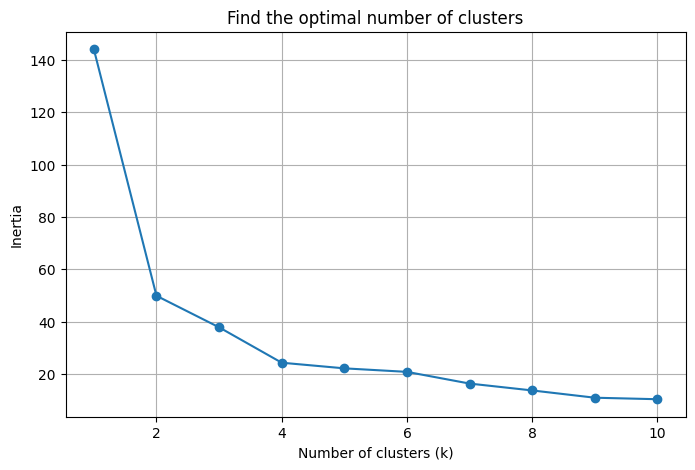

In [ ]:
find_optimal_k(attacking_features_df)

In [155]:
defensive_features_pl_df

,squad,performance_ga90,performance_sota90,blocks_blocks90,tkl+int90,clr90
0,Arsenal,0.89,3.085714,0.257265,0.645299,0.515385
1,Aston Villa,1.40,4.028571,0.281481,0.763889,0.675000
2,Bournemouth,1.20,4.685714,NaN,NaN,NaN
3,Brentford,1.51,5.428571,NaN,NaN,NaN
4,Brighton,1.60,3.914286,NaN,NaN,NaN
5,Chelsea,1.17,4.171429,NaN,NaN,NaN
6,Crystal Palace,1.37,4.085714,NaN,NaN,NaN
7,Everton,1.23,4.257143,NaN,NaN,NaN
8,Fulham,1.34,4.057143,NaN,NaN,NaN
9,Ipswich Town,2.17,5.600000,NaN,NaN,NaN


In [1]:
cluster_summerise(attacking_features_pl_df,4)

NameError: name 'cluster_summerise' is not defined

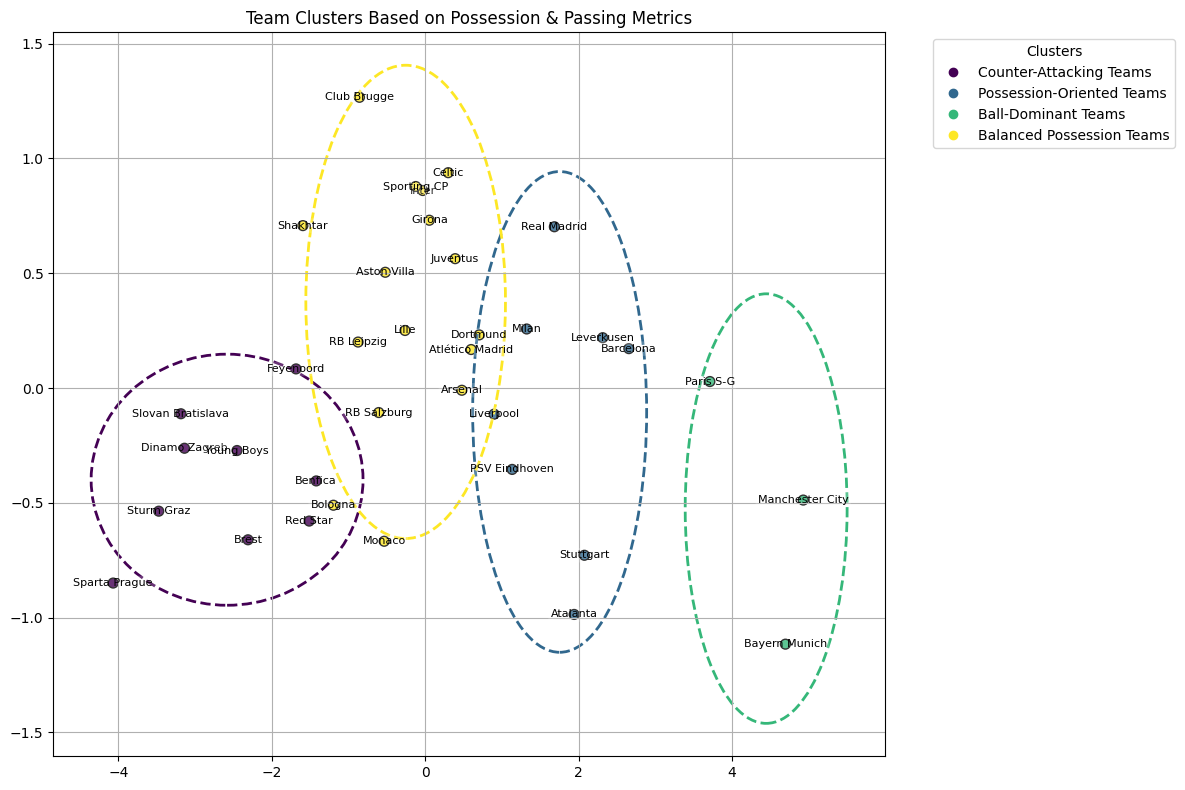

In [ ]:
cluster_visual(possession_passing_features_df, 4)

In [26]:
clusterd_dataframe(possession_passing_features_df,4)

,squad,poss,touches_att_3rd90,total_cmp90,total_cmp%,prgp90,cluster
0,Arsenal,50.7,172.538462,410.615385,84.1,38.538462,3
1,Aston Villa,47.3,131.583333,384.750000,83.8,33.083333,3
2,Atalanta,53.3,224.400000,463.300000,83.8,51.700000,1
3,Atlético Madrid,47.4,165.580645,463.935484,84.3,40.548387,3
4,Barcelona,60.6,183.076923,533.692308,86.7,50.307692,1
5,Bayern Munich,64.7,274.785714,600.857143,86.7,63.714286,2
6,Benfica,44.7,126.500000,357.500000,79.1,32.500000,0
7,Bologna,49.3,120.750000,353.875000,78.7,33.625000,3
8,Brest,41.8,123.400000,321.200000,76.9,27.000000,0
9,Celtic,50.9,130.700000,464.500000,85.2,33.700000,3


In [9]:
cluster_visual_3d_interactive(possession_passing_features_df,k=3)

Cluster 1 is the most attacking and efficient, representing elite attacking teams.

Cluster 2 is efficient, but they may not create as many chances as Cluster 1.

Cluster 0 is wasteful, creating a lot of chances but lacking finishing efficiency.

Cluster 3 is struggling offensively, with low volume and poor conversion rates.

Cluster 0: "Consistent Defenders" – Teams that perform well across all defensive metrics but don’t excel in any one area. They concede a moderate number of goals and face many shots but are solid defensively.

Cluster 1: "Effective Defenders" – Teams that actively defend and prevent goals through solid tackling, blocking, and interception. They face fewer shots on target.

Cluster 2: "Resilient Defenders" – Teams that are good at preventing chances from the start, requiring fewer blocks or clearances. They concede fewer goals and shots on target.

Cluster 3: "Aggressive Defenders" – Teams that are very aggressive in their defense but concede many goals. They make many tackles, blocks, and clearances but are vulnerable to shots on target.